# Soft computing 

 - uvod, 
 - motivacija 
 - eksperimenti



## Eksperiment 1 - aproksimacija funkcije primenom VNM

Napraviti sistem koji može da računa koren nekog broja, a da se koristi samo operacija stepenovanja.

Obucavajuci skup:

    - ulaz y**2 
    - izlaz interval 1 - 5 korak::0.1
    
 $x = y^2$


    

In [1]:
import numpy as np

y = np.arange(1, 5, 0.1)
x = y**2

Model neuronske mreže
- 1 ulazni neuron sa relu funkcijom aktivacije
- 40 neurona u sledecem sloju
- 50 neurona u sledecem 
- 50 neuroan u sledecem
- 1 neuron u izlaznom sloju

In [2]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(40, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('tanh'))
model.add(Dense(50))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('relu'))


Using Theano backend.


Metod za obucavanje
- SGD stohastic gradient descent

In [3]:
sgd = SGD(lr=0.01, decay=0.0000001, momentum=0.7)
model.compile(loss='mean_squared_error', optimizer=sgd)

Obucavanje

In [4]:
training = model.fit(x, y, nb_epoch=5000, 
                    batch_size=40, verbose=0)
print training.history['loss'][-1]

1.73660191649e-05


In [5]:
t = model.predict(x, verbose=1)

32/40 [=======================>......] - ETA: 0s40/40 [==============================] - 0s     


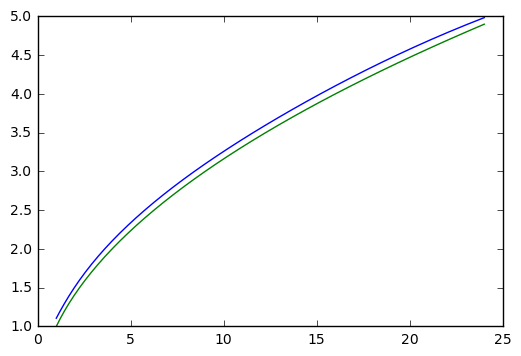

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, color='g')
plt.plot(x, t+0.1, color='b')
plt.show()


In [7]:
xx = np.array([[4.12343]])
ym = model.predict(xx)

import math
yt = math.sqrt(xx)

print 'predikcija:\t'+str(ym[0][0])
print 'tacna vrednost:\t'+str(yt)
print 'error:\t\t'+str(ym[0][0]-yt)

predikcija:	2.03330302238
tacna vrednost:	2.03062305709
error:		0.00267996529108


## Experiment 2 - aproksimirati funkciju polinomom 2. stepena


```
| x    | y   |
|------|------|
|   a  | table|

```

In [8]:
# br ventila   vreme[min]  pritisak[Bar]    protok[l] 
#   0           1              2              3 
In = [
  [8,5.03, 5.4, 64],
  [8,11.35, 5.4, 145],
  [8,10.28, 7.5, 155],
  [8,10.03,10.7, 179],
  [8,10.03,13.1, 195],
  [8,10.02, 3.5, 99],
  [16,11.35, 5.3, 280],
  [16,10.02,10.3, 350]
]

Ako su merenja zavisnosti protoka vode u odnosu na broj ventila i pritisak data gornjom tabelom odrediti funkciju zavisnosti protoka od pritiska.

In [9]:
In = np.array(In)
(h,w) = In.shape
Out = np.zeros((h, 2))

Lista $Out$ predstavlja matricu zavisnosti protoka po jednom ventilu u jednoj sekundi

In [10]:
Out[:,0] = In[:,2] # pritisak Bar
Out[:,1] = In[:,3]/(In[:,0]*60*In[:,1]) # litara u sekundi po jednom ventilu
print Out

[[  5.4          0.02650762]
 [  5.4          0.02661527]
 [  7.5          0.03141213]
 [ 10.7          0.03718013]
 [ 13.1          0.04050349]
 [  3.5          0.02058383]
 [  5.3          0.0256975 ]
 [ 10.3          0.03638556]]


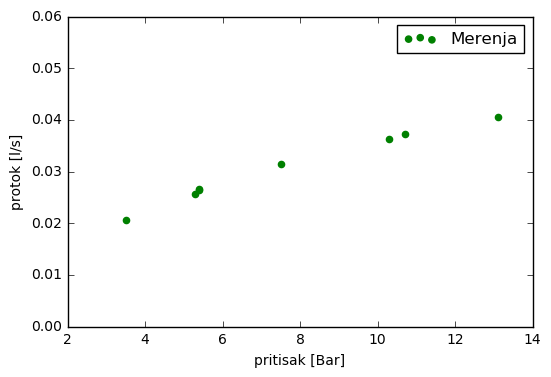

In [11]:
plt.scatter(Out[:,0], Out[:,1], color='g', label='Merenja')
plt.ylabel('protok [l/s]')
plt.xlabel('pritisak [Bar]')
plt.legend();

In [12]:
p = np.polyfit(Out[:,0], Out[:,1], 2)
print p

[-0.00010674  0.00380448  0.00880618]


In [14]:
t = np.arange(3,14,0.5)
z = np.polyval(p, t)


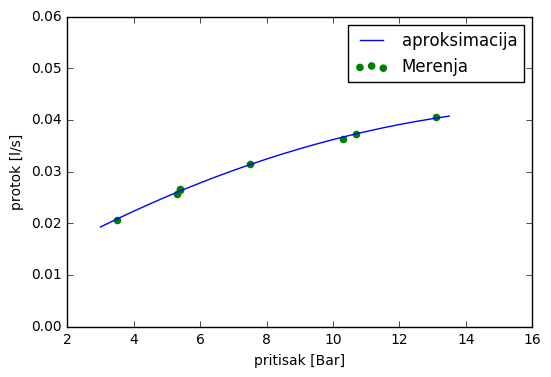

In [15]:
plt.scatter(Out[:,0], Out[:,1], color='g', label='Merenja')
plt.plot(t, z, c='#0000ff', label='aproksimacija')
plt.ylabel('protok [l/s]')
plt.xlabel('pritisak [Bar]')
plt.legend();

Kako odrediti kvalitet aproksimacije?

In [16]:
z_aproximacija = np.polyval(p, Out[:,0])
z_tacno = Out[:,1]
err = (z_aproximacija-z_tacno)**2

print err

[  7.28059831e-08   1.42488551e-07   5.85825844e-09   1.28144166e-08
   3.11366993e-08   5.31040418e-08   7.51069076e-08   7.98612230e-08]


Srednja kvadratna greška i varijansa greške

In [17]:
print err.mean()

5.91470100833e-08


In [18]:
print err.std()

4.12669240351e-08
